In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

# Análisis de Datos 

Las semanas de estudio son las dos últimas de abril (7 días cada una)

In [3]:
datos = pd.read_excel(io='data/datos.xlsx', sheet_name = "Hoja1")
datos

,AÑO,MES,DIA,FECHA,HORA,Caudal
0,2015,1,1,jueves,00:00:00,1100.7567
1,2015,1,1,jueves,00:30:00,1100.7567
2,2015,1,1,jueves,01:00:00,1100.7567
3,2015,1,1,jueves,01:30:00,742.7767
4,2015,1,1,jueves,02:00:00,742.7767
...,...,...,...,...,...,...
81784,2019,12,31,martes,21:30:00,909.7567
81785,2019,12,31,martes,22:00:00,909.7567
81786,2019,12,31,martes,22:30:00,909.7567
81787,2019,12,31,martes,23:00:00,909.7567


In [4]:
from datetime import datetime 
datos_indexados = pd.DataFrame()
fechas_dt = []
caudal_dt = []
for registro in datos.values:
    fecha = "{}-{}-{} {}".format(registro[0], registro[1], registro[2], registro[4])
    fecha_dt = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    fechas_dt.append(fecha_dt)
    caudal_dt.append(registro[5])
datos_indexados['FECHA'] = fechas_dt
datos_indexados['CAUDAL'] = caudal_dt

datos_indexados.set_index('FECHA', drop=True, inplace = True)

datos_indexados

,CAUDAL
FECHA,
2015-01-01 00:00:00,1100.7567
2015-01-01 00:30:00,1100.7567
2015-01-01 01:00:00,1100.7567
2015-01-01 01:30:00,742.7767
2015-01-01 02:00:00,742.7767
...,...
2019-12-31 21:30:00,909.7567
2019-12-31 22:00:00,909.7567
2019-12-31 22:30:00,909.7567


In [9]:
#Figura 5.2: Curva caudal semanal
fechai_ter_sem = '2019-04-17 00:00:00'
fechaf_ter_sem = '2019-04-24 00:00:00'
fechai_cuar_sem = '2019-04-2 00:00:00'
fechaf_cuar_sem = '2019-05-01 00:00:00'
ter_sem_abril = datos_indexados[datos_indexados.index.get_loc(fechai_ter_sem)[0]:
                                datos_indexados.index.get_loc(fechaf_ter_sem)[0]]
                                
cuar_sem_abril = datos_indexados[datos_indexados.index.get_loc(fechai_cuar_sem)[0]:
                                datos_indexados.index.get_loc(fechaf_cuar_sem)[0]]
ter_sem_abril

,CAUDAL
FECHA,
2019-04-17 00:00:00,783.6267
2019-04-17 00:30:00,783.6267
2019-04-17 01:00:00,783.6267
2019-04-17 01:30:00,783.6267
2019-04-17 02:00:00,783.6267
...,...
2019-04-23 21:30:00,579.0667
2019-04-23 22:00:00,579.0667
2019-04-23 22:30:00,579.0667


In [10]:
cuar_sem_abril

,CAUDAL
FECHA,
2019-04-24 00:00:00,630.2067
2019-04-24 00:30:00,630.2067
2019-04-24 01:00:00,630.2067
2019-04-24 01:30:00,630.2067
2019-04-24 02:00:00,630.2067
...,...
2019-04-30 21:30:00,846.0667
2019-04-30 22:00:00,794.9267
2019-04-30 22:30:00,794.9267


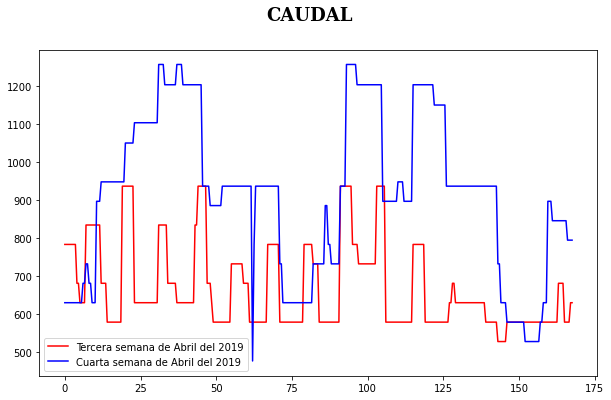

In [19]:
indice = np.arange(0, 24*7, 0.5)
plt.figure(figsize=(10,6))
plt.plot(indice, 
         ter_sem_abril, 
         color = 'red', 
         label = 'Tercera semana de Abril del 2019')
plt.plot(indice, 
         cuar_sem_abril, 
         color = 'blue', 
         label = 'Cuarta semana de Abril del 2019')
plt.suptitle('CAUDAL',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()


In [20]:
#Tabla 5.1  Análisis descriptiva con datos reales del caudal
#ULTIMOS 7 DIAS DE LA SEMANA DE ABRIL

cuar_sem_abril.describe()['CAUDAL']
maximo = np.max(cuar_sem_abril['CAUDAL'])
print('Máximo = {}'.format(maximo))
minimo = np.min(cuar_sem_abril['CAUDAL'])
print('Mínimo = {}'.format(minimo))
rango = maximo - minimo
print('Rango = {}'.format(rango))
media = np.mean(cuar_sem_abril['CAUDAL'])
print('Media = {}'.format(media))
mediana = cuar_sem_abril['CAUDAL'].median()
print('Mediana = {}'.format(mediana))
varianza = cuar_sem_abril['CAUDAL'].var()
print('Varianza = {}'.format(varianza))
std = np.std(cuar_sem_abril['CAUDAL'])
print('Desviación Estándar = {}'.format(std))
coef_var = np.std(cuar_sem_abril['CAUDAL']) /np.mean(cuar_sem_abril['CAUDAL']) * 100
print('Coeficiente de variación = {} %'.format(coef_var))
lim_max, lim_min = np.percentile((cuar_sem_abril['CAUDAL']), [75, 25])
lim_max = media + 1 * std
lim_min = media - 1 * std
print('Límite máximo = {}'.format(lim_max))
print('Límite mínimo = {}'.format(lim_min))

cuar_sem_abril.describe()['CAUDAL']

Máximo = 1257.4467
Mínimo = 476.7866999999999
Rango = 780.6600000000001
Media = 916.4725333333391
Mediana = 937.0466999999999
Varianza = 44846.12636109462
Desviación Estándar = 211.4536728149329
Coeficiente de variación = 23.072559746645787 %
Límite máximo = 1127.926206148272
Límite mínimo = 705.0188605184062


count     336.000000
mean      916.472533
std       211.769040
min       476.786700
25%       732.486700
50%       937.046700
75%      1104.026700
max      1257.446700
Name: CAUDAL, dtype: float64

In [21]:
#Funciones
def funcionConstante(x, constante):
    return constante

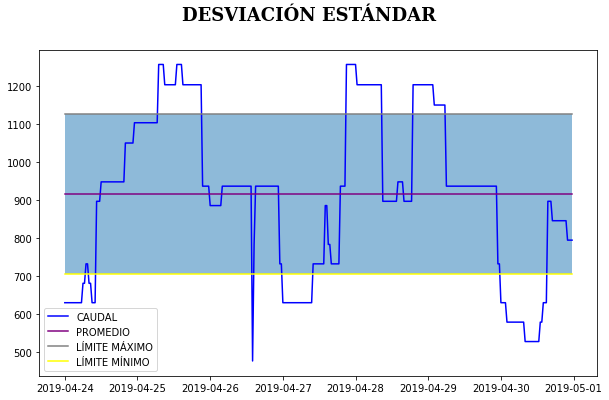

In [31]:
#Figura 5.3: Desviación estándar de datos (de la semana en estudio)

plt.figure(figsize=(10,6))
plt.plot(cuar_sem_abril.index, 
         cuar_sem_abril, 
         color = 'blue', 
         label = 'CAUDAL')
plt.plot(cuar_sem_abril.index, 
         [funcionConstante(x, media) for x in cuar_sem_abril.index], 
         color = 'purple', 
         label = 'PROMEDIO')

plt.plot(cuar_sem_abril.index, 
         [funcionConstante(x, lim_max) for x in cuar_sem_abril.index], 
         color = 'gray', 
         label = 'LÍMITE MÁXIMO')

plt.plot(cuar_sem_abril.index, 
         [funcionConstante(x, lim_min) for x in cuar_sem_abril.index], 
         color = 'yellow', 
         label = 'LÍMITE MÍNIMO')
plt.fill_between(cuar_sem_abril.index,
                   [funcionConstante(x, lim_max) for x in cuar_sem_abril.index], 
                   [funcionConstante(x, lim_min) for x in cuar_sem_abril.index],
                   alpha = .5,
                   linewidth = 0
                  )

plt.suptitle('DESVIACIÓN ESTÁNDAR',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()


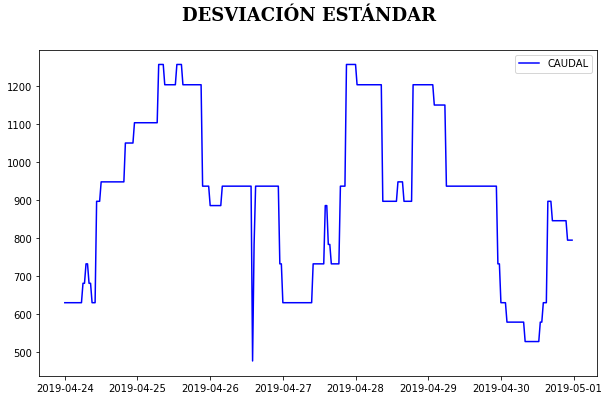

In [32]:
# Figura 5.4:Curva del caudal semana en estudio
plt.figure(figsize=(10,6))

plt.plot(cuar_sem_abril.index, 
         cuar_sem_abril, 
         color = 'blue', 
         label = 'CAUDAL')

plt.suptitle('DESVIACIÓN ESTÁNDAR',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()

Exportación de datos para análisis de capacidades en minitab

In [34]:
# Figura 5.5: Capacidades del proceso para el caudal (datos reales – 1 semana)
cuar_sem_abril.to_csv('capabilities/data_sem_abril.csv')
cuar_sem_abril.describe()

,CAUDAL
count,336.000000
mean,916.472533
std,211.769040
min,476.786700
25%,732.486700
50%,937.046700
75%,1104.026700
max,1257.446700


In [35]:
# Figura 5.6: Curva de la demanda eléctrica diaria con intervalos de 1 hora
#Datos del 30 de abril y del 29

fechai_29_abr = '2019-04-29 00:00:00'
fechaf_29_abr= '2019-04-30 00:00:00'
fechai_30_abr = '2019-04-30 00:00:00'
fechaf_30_abr = '2019-05-01 00:00:00'
dia_29_abr = datos_indexados[datos_indexados.index.get_loc(fechai_29_abr)[0]:
                                datos_indexados.index.get_loc(fechaf_29_abr)[0]]
                                
dia_30_abr = datos_indexados[datos_indexados.index.get_loc(fechai_30_abr)[0]:
                                datos_indexados.index.get_loc(fechaf_30_abr)[0]]
dia_29_abr

,CAUDAL
FECHA,
2019-04-29 00:00:00,1204.0467
2019-04-29 00:30:00,1204.0467
2019-04-29 01:00:00,1204.0467
2019-04-29 01:30:00,1204.0467
2019-04-29 02:00:00,1150.6467
2019-04-29 02:30:00,1150.6467
2019-04-29 03:00:00,1150.6467
2019-04-29 03:30:00,1150.6467
2019-04-29 04:00:00,1150.6467


In [36]:
dia_30_abr

,CAUDAL
FECHA,
2019-04-30 00:00:00,630.2067
2019-04-30 00:30:00,630.2067
2019-04-30 01:00:00,630.2067
2019-04-30 01:30:00,630.2067
2019-04-30 02:00:00,579.0667
2019-04-30 02:30:00,579.0667
2019-04-30 03:00:00,579.0667
2019-04-30 03:30:00,579.0667
2019-04-30 04:00:00,579.0667


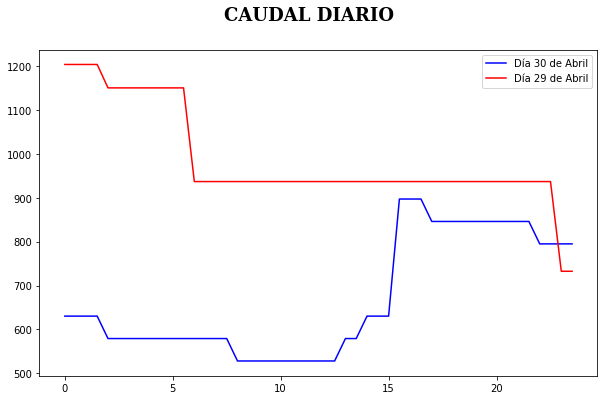

In [41]:
indice = np.arange(0, 24, 0.5)
plt.figure(figsize=(10,6))
plt.plot(indice, 
         dia_30_abr, 
         color = 'blue', 
         label = 'Día 30 de Abril')

plt.plot(indice, 
         dia_29_abr, 
         color = 'red', 
         label = 'Día 29 de Abril')

plt.suptitle('CAUDAL DIARIO',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()


In [42]:
#Exportacion de datos para minitab, datos del 31 de enero del 2019
dia_30_abr.to_csv('data/datos_30_abril_2019.csv')
dia_30_abr.describe()

,CAUDAL
count,48.000000
mean,669.367533
std,134.952150
min,527.926700
25%,579.066700
50%,604.636700
75%,846.066700
max,897.206700
